In [12]:
#from PandasToPowerpoint import df_to_powerpoint
from sklearn import datasets
import pandas as pd
%pylab inline
import matplotlib.pylab as plt
import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


/Users/pavlos/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

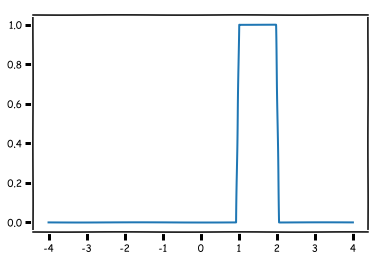

In [14]:
# generate data

def box(beg, end, x):
    y = 0*x
    y[(x>1) & (x<2)] = 1
    return y

x = np.linspace(-4,4, 100)
y = box(-2,2,x)
plt.plot(x, y)

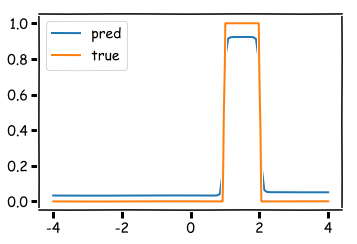

In [16]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


# create model
model = Sequential()
model.add(Dense(2, input_dim=1,  weights = [np.array([[30,-20]]),np.array([-28,60])] , activation='sigmoid'))
#model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1,  weights = [np.array([[1,1]]).T, np.array([-1]).T] , trainable=True, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.3, decay=1e-6, momentum=0.9, nesterov=True)
# Compile model
model.compile(loss='mse', optimizer=sgd,  metrics=['mse'])


# Fit the model
history = model.fit(x, y, epochs=100, batch_size=10, verbose=0);

predictions = model.predict(x)
plt.plot(x, predictions, label='pred')
plt.plot(x,y, label='true')
plt.legend()

In [ ]:
plt.plot(history.history['mean_squared_error'])

In [6]:
l = model.layers
l[1].get_weights()



[array([[ 5.85034227],
        [ 5.376194  ]], dtype=float32), array([-8.78179264], dtype=float32)]

## Plot for output 

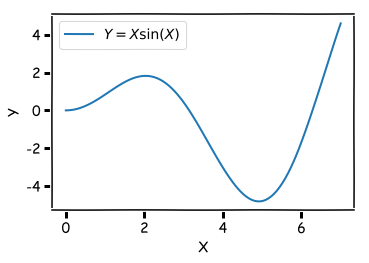

In [307]:
fig, ax1 = plt.subplots()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

x = np.linspace(0, 7, 100)
y = x*sin(x)

ax1.plot(x,y, label=r'$Y=X\sin(X)$')



ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax1.legend()

#plt.savefig('fig/LinR.png', dpi=300, transparent=True)


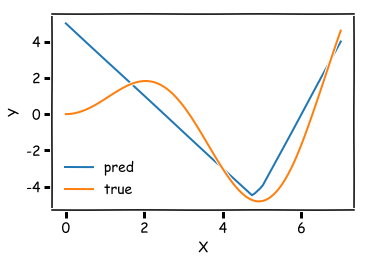

In [320]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


# create model
model = Sequential()
model.add(Dense(2, input_dim=1 , trainable=False,  weights = [np.array([[4,-2]]),np.array([-19,10])] , activation='relu'))
#model.add(Dense(2, activation='relu'))
#model.add(Dense(3, input_dim=1 , trainable=True,  weights = [np.array([[5,3,0.5]]),np.array([-25,-6,3])] , activation='relu'))
#model.add(Dense(1, weights = [np.array([[1,-1,1]]).T, np.array([-3.]).T] , trainable=False, activation='linear'))
model.add(Dense(1, weights = [np.array([[1,1]]).T, np.array([-5.]).T] , trainable=False, activation='linear'))

sgd = optimizers.SGD(lr=0.53, decay=1e-6, momentum=0.9, nesterov=True)
# Compile model
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])


# Fit the model
history = model.fit(x, y, epochs=0, batch_size=20, verbose=0);

predictions = model.predict(x)
plt.plot(x, predictions, label='pred')
plt.plot(x,y, label='true')
plt.legend(frameon = False)
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('../fig/2n_1l.png', dpi=300, transparent=True)

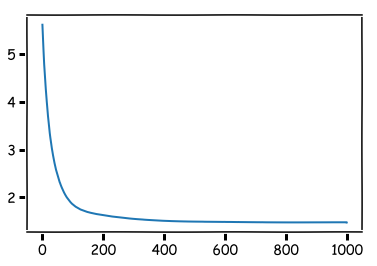

In [288]:
plt.plot(history.history['mean_squared_error'])

In [42]:
history.history['mean_squared_error']

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [305]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


plt.plot(x,yl, label='Y=f(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
#plt.savefig('fig/LogR.png', dpi=300, transparent=True)


NameError: name 'yl' is not defined

# Relu sofplus etc

In [255]:
def relu(W, b, x):
    h = W*x+b
    return h * (h > 0)
def softplus(W,b, x):
    h = W*x+b
    return np.log(1 + np.exp(h))

def derrelu(W, b, x):
    h = W*x+b
    return W * (h > 0)

def dersoftplus(W, b, x):
    h = W/(1+np.exp(-W*x-b))
    return h

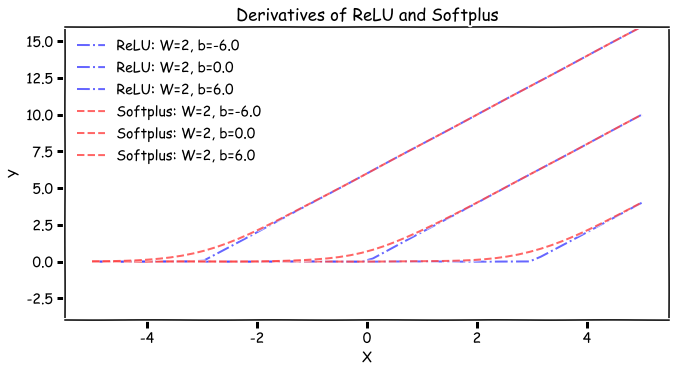

In [289]:
fig = plt.figure(figsize=(12,6))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)
x = np.linspace(-5,5)
W= np.linspace(-6,6,3)
for w in W: 
    plt.plot(x, relu(2, w, x), 'b-.', alpha=0.6, label='ReLU: W=2, b='+str(w))

plt.title('Derivatives of ReLU and Softplus')
for w in W: 
    plt.plot(x, softplus(2, w, x), 'r--', alpha=0.6,  label='Softplus: W=2, b='+str(w))
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-4,16))
plt.legend(frameon=False)


plt.savefig('../fig/ReluSoftplusB.png', dpi=300, transparent=True)

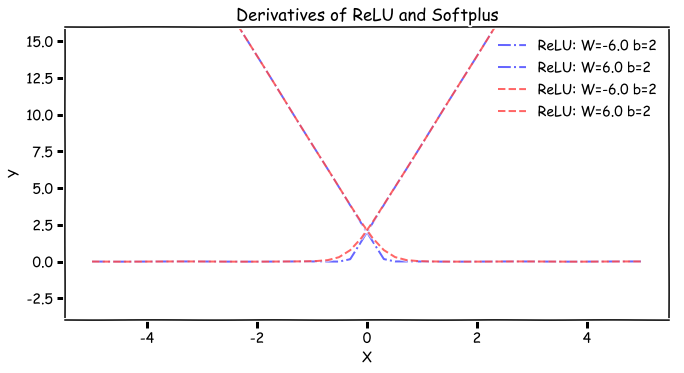

In [295]:
fig = plt.figure(figsize=(12,6))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)
x = np.linspace(-5,5)
W= np.linspace(-6,6,2)
for w in W: 
    plt.plot(x, relu(w, 2, x), 'b-.', alpha=0.6, label='ReLU: W='+ str(w) +' b=2')

plt.title('Derivatives of ReLU and Softplus')
for w in W: 
    plt.plot(x, softplus(w, 2, x), 'r--', alpha=0.6, label='ReLU: W='+ str(w) +' b=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-4,16))
plt.legend(frameon=False)


plt.savefig('../fig/ReluSoftplusW.png', dpi=300, transparent=True)

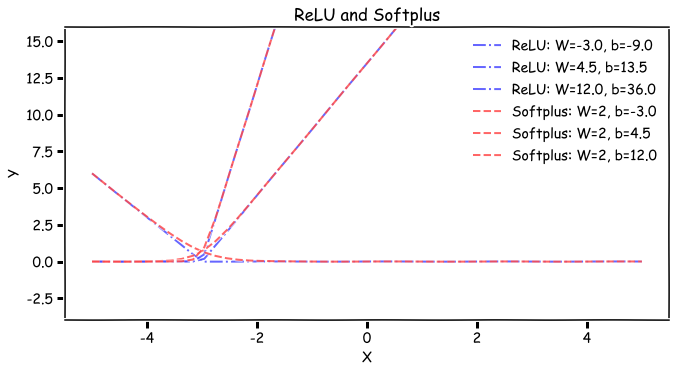

In [281]:
fig = plt.figure(figsize=(12,6))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)
x = np.linspace(-5,5)
W= np.linspace(-3,12,3)
for w in W: 
    plt.plot(x, relu(w, 3*w, x), 'b-.', alpha=0.6, label='ReLU: W=' + str(w) +', b='+str(3*w))

plt.title('ReLU and Softplus')
for w in W: 
    plt.plot(x, softplus(w, 3*w, x), 'r--', alpha=0.6,  label='Softplus: W=2, b='+str(w))
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-4,16))
plt.legend(frameon=False)


plt.savefig('../fig/ReluSoftplusW.png', dpi=300, transparent=True)

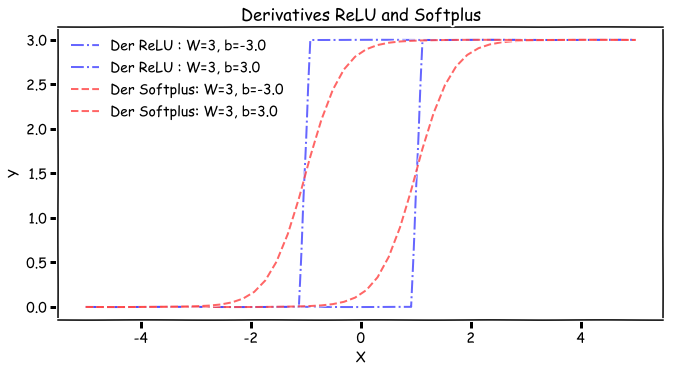

In [304]:
fig = plt.figure(figsize=(12,6))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)
x = np.linspace(-5,5)
W= np.linspace(-3,3,2)
for w in W: 
    plt.plot(x, derrelu(3, w, x), 'b-.', alpha=0.6, label='Der ReLU : W=3, b='+str(w))

plt.title('Derivatives ReLU and Softplus')
for w in W: 
    plt.plot(x, dersoftplus(3, w, x), 'r--', alpha=0.6,  label='Der Softplus: W=3, b='+str(w))
plt.xlabel('X')
plt.ylabel('Y')
#plt.ylim((-4,16))
plt.legend(frameon=False)


plt.savefig('../fig/ReluSoftplusder.png', dpi=300, transparent=True)

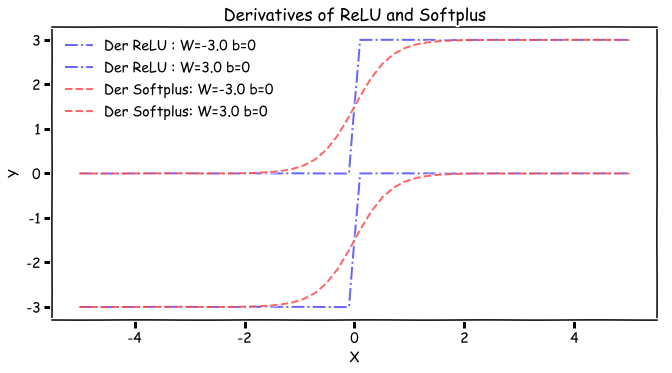

In [303]:
fig = plt.figure(figsize=(12,6))
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)
x = np.linspace(-5,5)
W= np.linspace(-3,3,2)
for w in W: 
    plt.plot(x, derrelu(w, 0, x), 'b-.', alpha=0.6, label='Der ReLU : W='+ str(w) + ' b=0')

plt.title('Derivatives of ReLU and Softplus')
for w in W: 
    plt.plot(x, dersoftplus(w, 0, x), 'r--', alpha=0.6,  label='Der Softplus: W='+ str(w) + ' b=0')
plt.xlabel('X')
plt.ylabel('Y')
#plt.ylim((-4,16))
plt.legend(frameon=False)


plt.savefig('../fig/ReluSoftplusder2.png', dpi=300, transparent=True)

In [ ]:


from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
fig.patch.set_alpha(1.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)




line,  = ax.plot(x,yl, label=r'$Y=\frac{1}{1+e^{-(X+\beta_0) }}$')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend(loc=5)


def update(i):
    b0=2*i
    label = r'$\beta_0=$ {0}'.format(b0)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1+np.exp(-x+b0)))
    ax.set_title(label)
    return line, ax


# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(-20, 20,2), interval=300, blit=False)

#anim.save('fig/LogBeta0.gif', dpi=120, writer='imagemagick',  savefig_kwargs={'transparent': True, 'facecolor': '#F9F9F9'})



#plt.savefig('fig/LogRBeta.png', dpi=300, transparent=True)

In [ ]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
fig.patch.set_alpha(1.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)




line,  = ax.plot(x,yl, label=r'$Y=\frac{1}{1+e^{-(X+\beta_0) }}$')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend(loc=5)


def update(i):
    b1=2*i
    label = r'$\beta_1=$ {0}'.format(np.round(b1, decimals=2))
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1+np.exp(-b1*x)))
    ax.set_title(label)
    return line, ax


# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(.2, -.2,-.03), interval=200, blit=False)

anim.save('fig/LogBeta1.gif', dpi=120, writer='imagemagick',  savefig_kwargs={'transparent': True, 'facecolor': '#F9F9F9'})



#plt.savefig('fig/LogRBeta.png', dpi=300, transparent=True)

## Likelihood function 

In [ ]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x = np.linspace(-10, 10, 100)
y = x
yl = 1/(1+np.exp(-0.5*y))

#plt.plot(x,yl, label=r'$P(Y=1)=\frac{1}{1+e^{-X\beta}}$')
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.legend()
plt.ylim((-0.2, 1.1))
#plt.savefig('fig/Likelihood1.png', dpi=300, transparent=True)

### FRAME 2 

plt.axvline(x=3, color='#A2A2A2', ls='-.')
#plt.savefig('fig/Likelihood2.png', dpi=300, transparent=True)

### FRAME 3
plt.annotate(r'  $P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-8, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.savefig('fig/Likelihood3.png', dpi=300, transparent=True)

### FRAME 4

plt.annotate(r'  $p=P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-10, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.savefig('fig/Likelihood4.png', dpi=300, transparent=True)


### FRAME 5

plt.clf()
plt.ylim((-0.2, 1.1))
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.axvline(x=3, color='#A2A2A2', ls='-.')
coinf = np.random.binomial(1, 0.7, size=1)
plt.plot( [3], [0], 'ko')
plt.plot( [3], [1], 'ko')

plt.annotate(r'  $p$', xy=(2.7, 1),\
             xytext=(-3, 0.98),
            arrowprops=dict(facecolor='white', shrink=0.0),
            )
plt.annotate(r'  $1-p$', xy=(2.8, .00),\
             xytext=(-4, -.02),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
plt.savefig('fig/Likelihood5.png', dpi=300, transparent=True)

plt.clf()



## Plots for simple model 

In [ ]:
from sklearn import linear_model

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))


plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")




data_x = df_heart.MaxHR
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)

plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')

#plt.legend(loc=3)


plt.savefig('fig/FittingLogR1.png', dpi=300, transparent=True)

In [5]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x.values.reshape(-1,1), data_y);


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04326016]]
Estimated beta0: 
 [ 6.30193148]


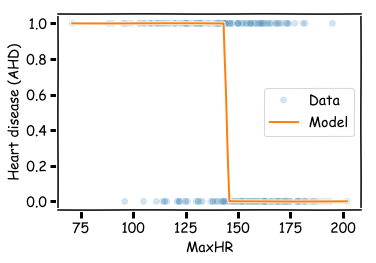

In [178]:

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
y_ = logreg.predict(x.reshape(-1,1))
plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,y_, label='Model')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")



plt.savefig('fig/FittingLogR2.png', dpi=300, transparent=True)

## Categorical predictors

In [ ]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))


plt.xlabel("xxx")
plt.ylabel("Heart disease (AHD)")




data_x = df_heart.Sex.values
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1).values

idx = np.where(data_x==0)
print(idx[0].shape)
print("percentage of females with HD", data_y[idx].sum()/idx[0].shape)
idx = np.where(data_x==1)
print(idx[0].shape)
print("percentage of males with HD", data_y[idx].sum()/idx[0].shape)

In [219]:
logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x.reshape(-1,1), data_y);


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[ 1.27219788]]
Estimated beta0: 
 [-1.05778826]


(97,)

# Probit

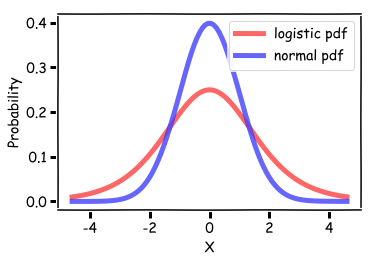

In [236]:
from scipy.stats import logistic
from scipy.stats import norm 
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)



x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
plt.plot(x, logistic.pdf(x,loc=0, scale=1),   'r-', lw=5, alpha=0.6, label='logistic pdf')
plt.plot(x, norm.pdf(x,loc=0, scale=1),   'b-', lw=5, alpha=0.6, label='normal pdf')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()


plt.savefig('fig/NormVsLog.png', dpi=300, transparent=True)

## Multi-regression

In [6]:
data_x = df_heart[['MaxHR','Sex']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.04496354  1.40079047]]
Estimated beta0: 
 [ 5.58662464]


In [7]:
df_heart['Interaction'] = df_heart.MaxHR * df_heart.Sex 

data_x = df_heart[['MaxHR','Sex', 'Interaction']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2, beta3: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2, beta3: 
 [[-0.02645985  5.38749287 -0.02689767]]
Estimated beta0: 
 [ 2.88218441]


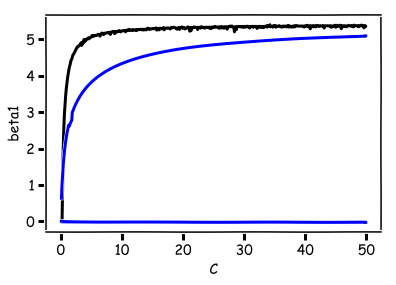

In [20]:
#Regularization Example

beta1_l1 = []
beta1_l2 = []
Cs = []

for i in range(1, 500):
    C = i/10
    logitm_l1 = LogisticRegression(C = C, penalty = "l1")
    logitm_l1.fit(data_x, data_y)
    logitm_l2 = LogisticRegression(C = C, penalty = "l2")
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(Cs, beta1_l1,  color='black', lw=3)
plt.plot(Cs, beta1_l2,  color='blue', lw=3)
plt.xlabel ("C")
plt.ylabel("beta1")
plt.show()


[2 2 2 0 2 0 2 0 2 2 0 2 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 2 2 0 0 2 2 0 2 0 2 2 2 0 2 2 0 0 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 0 2
 2 2 2 0 0 2 0 2 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 0 2 0
 2 0 0 2 2 2 2 2 0 2 2 0 0 2 0 2 0 0 0 2 2 0 0 2 0 2 2 0 0 2 0 2 2 2 2 2 2
 0 0 0 2 2 0 0 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 0 0 2 0 2 0 2 2 2
 0 0 0 0 0 0 2 2 2 1 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 1 2
 0 0 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2 0 2 0 2 0 0 2 0 0
 2 0 0 0 0 2 0]


(array([ 151.,    0.,    0.,    0.,    0.,    4.,    0.,    0.,    0.,  148.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

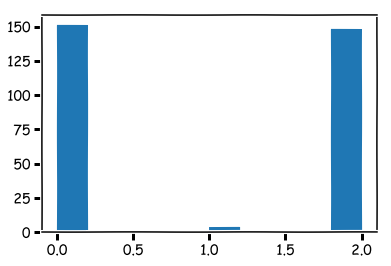

In [25]:
# Response for Multinomial Logistic Regression Example

print(df_heart.RestECG.values)
hist(df_heart.RestECG.values)

In [23]:
# Multinomial Logistic Regression Example

data_y = df_heart['RestECG']

logitm = LogisticRegression(C = 10000000)
logitm.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[  1.07431726e-02   4.23316195e-01  -2.94155214e-03]
 [ -6.79582443e-02  -9.06495849e+00   5.33131313e-02]
 [ -1.53310028e-03   1.01921532e+00  -5.90678483e-03]]
Estimated beta0: 
 [-1.60436853  5.8587811   0.08816518]
